In [1]:
import gc
import numpy as np
import pandas as pd
import back_testing as bt

gc.collect()

0

In [2]:
price_df = pd.read_csv('./data/sp500.csv')
price_df.set_index('datadate', inplace=True)
df_ = price_df[['AAPL', 'DIS', 'XOM', 'INTC', 'MSFT', 'AMZN', 'NVDA', 'CRM', 'GOOGL', 'TSLA']]
df_.index = pd.to_datetime(df_.index, format='%Y-%m-%d')

idx_df = pd.read_csv('./data/GSPC.csv', index_col='Date')
idx_df = idx_df.pct_change().apply(lambda x: np.log1p(x)).dropna()
idx_df.index = pd.to_datetime(idx_df.index, format='%Y-%m-%d')

returns = bt.get_momentum(df_, 1)
momentum_12m = bt.get_momentum(df_, 12)
weights = bt.dual_momentum_strategy(momentum_12m)

In [3]:
result_df = pd.DataFrame()
result_df = bt.return_Table(weights, returns, result_df, True, 'Neutral', True, False)
result_df = pd.concat([result_df, idx_df], axis=1)
result_df.to_csv('./general_results/result.csv')

In [4]:
result_df.columns=['DM', 'S&P 500']

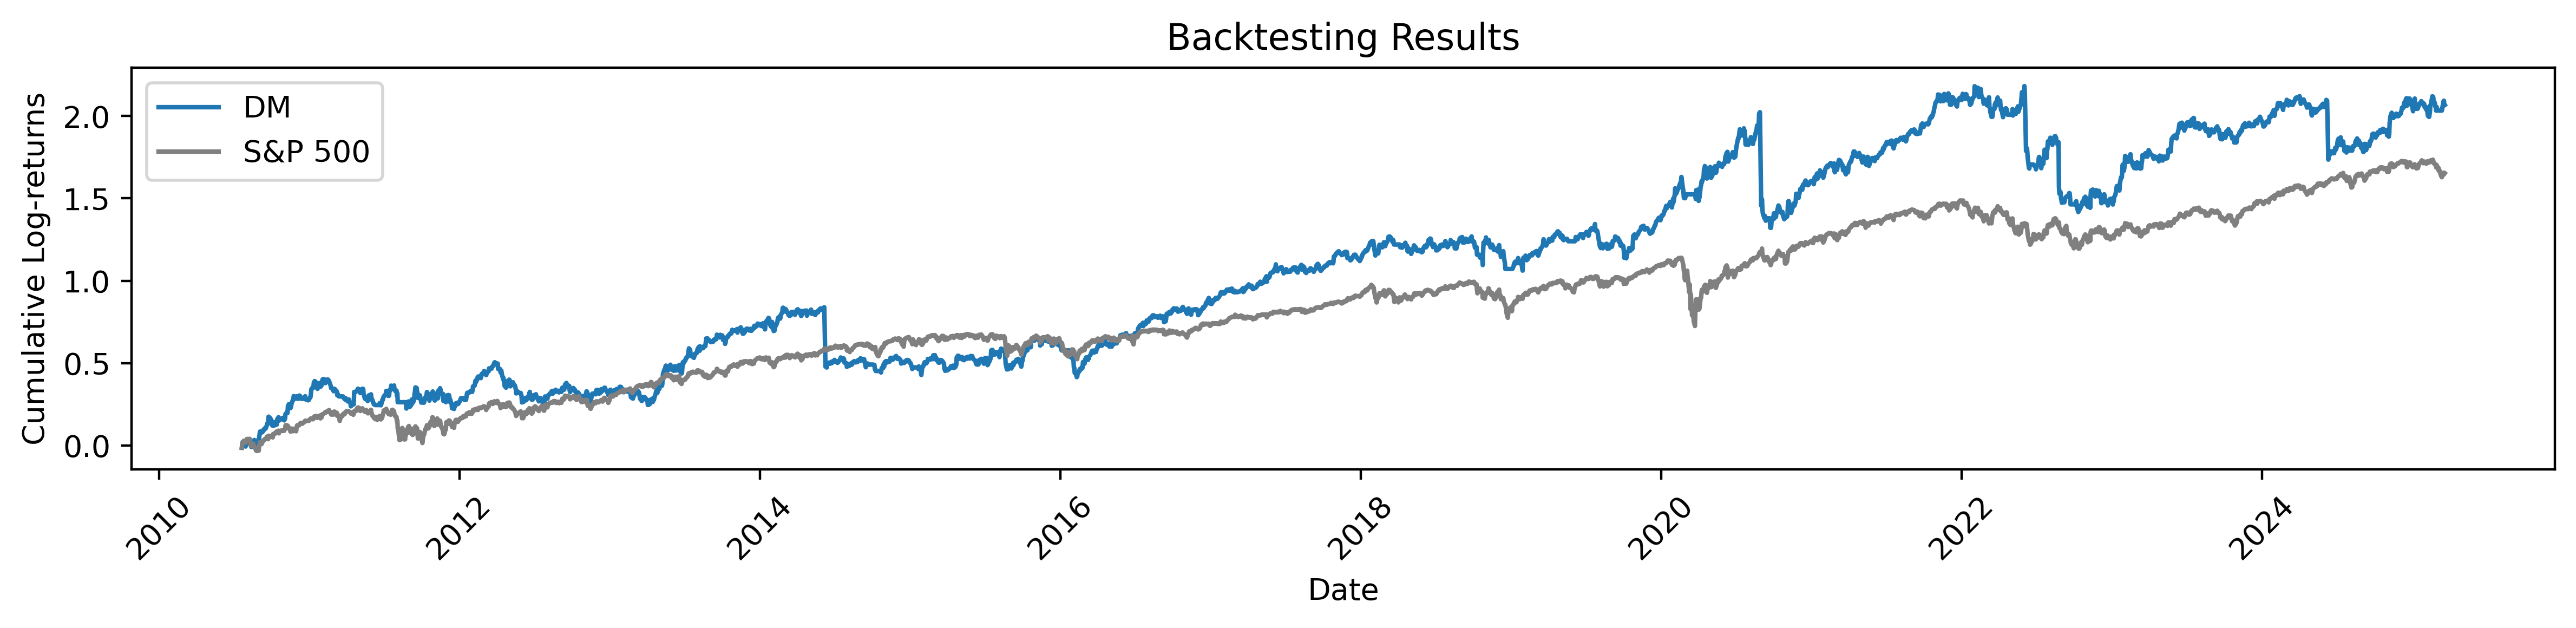

In [5]:
bt.plot_result(result_df, True)

In [6]:
bt.cal_turnover(weights)

'746.72'

In [7]:
metric = bt.METRICS(result_df, result_df.index)
metric.cal_describe()
metric.cal_monthly_statistics()

In [8]:
metric.annual_statistics

,DM,S&P 500
count,3690.0,3690.0
cumulative return,0.0067,0.0054
annualized return mean,0.0067,0.0054
annualized return std,0.0732,0.0381
annualized return downside std,0.0868,0.0315
sharpe ratio,0.0922,0.1415
sortino ratio,0.0777,0.171
gross profit,20.5749,14.0337
gross loss,-18.5079,-12.38
profit factor,1.1117,1.1336


In [9]:
metric.monthly_statistics

,DM,S&P 500
Mean,0.0006,0.0004
Standard deviation,0.0204,0.0108
Standard error,0.0003,0.0002
t-statistic,1.695,2.7476
Min,-0.5672,-0.1277
25%,-0.0059,-0.0038
50%,0.0003,0.0007
75%,0.0086,0.0056
Max,0.0874,0.0897
Skew,-10.9192,-0.7467
